In [28]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import gc

from sklearn import linear_model, metrics
import scipy.optimize
import random
from math import exp
from math import log

%matplotlib inline
import matplotlib.pyplot as plt

import random

In [29]:
df = pd.read_csv('data/train.csv', index_col=None, header=0)
df_test = pd.read_csv('data/test.csv', index_col=None, header=0)

In [22]:
### HOT ENCODING ###
for i in range(0,9):
  if i==7:
    continue
  featureName = 'X'+str(i)
  for c in df[featureName].unique():
    df[featureName+c] = np.where(df[featureName]==c, 1, 0)
  df = df.drop(featureName,1)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X8q,X8w,X8g,X8y,X8l,X8f,X8u,X8r,X8t,X8c
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,0,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,0,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,0,0,0,0,0,0,0,0


mean: 100.669318128 std: 12.6778749695


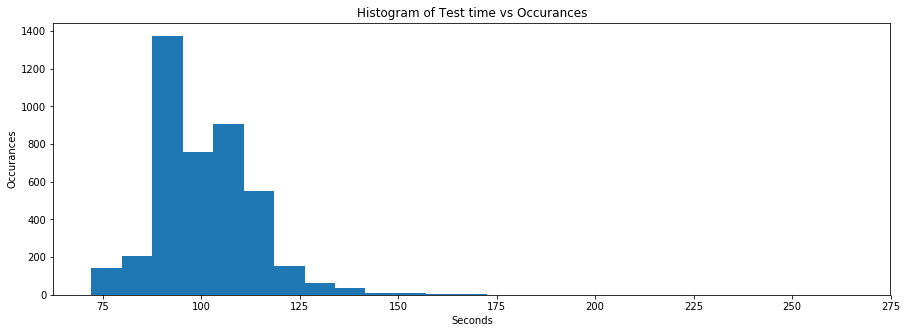

In [31]:
y_train = df['y'].values
plt.figure(figsize=(15,5))
plt.hist(y_train, bins=25)
plt.xlabel('Seconds')
plt.ylabel('Occurances')
plt.title('Histogram of Test time vs Occurances')
print('mean: {} std: {}'.format(y_train.mean(), y_train.std()))

In [32]:
cols = [col for col in df.columns if 'X' in col]
print('Num features: {}'.format(len(cols)))

print('Feature types:')
df[cols].dtypes.value_counts()

Num features: 376
Feature types:


int64     368
object      8
dtype: int64

In [33]:
counts = [[], [], []]
for c in cols:
    typ = df[c].dtype
    # how many unique variables there are
    uniq = len(np.unique(df[c]))
    if uniq == 1: 
        counts[0].append(c)
    elif uniq == 2 and typ == np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)
print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

    

Constant features: 12 Binary features: 356 Categorical features: 8



### Feature Selection
We can see that theres 12 features that are constant, so we can drop those

In [36]:
usable_columns = list(set(df.columns)-set(['ID', 'y']))
y_train = df['y'].values
id_test = df_test['ID'].values

x_train = df[usable_columns]
x_test = df_test[usable_columns]

# Now drop all constant features
for col in usable_columns:
    card = len(np.unique(x_train[col]))
    if card == 1:
        x_train.drop(col, axis=1)
        x_test.drop(col,axis=1)
    if card > 2:
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[col] = x_train[col].apply(mapper)
        x_test[col] = x_test[col].apply(mapper)

x_train.head()

/Users/thomasan/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/thomasan/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,X189,X185,X184,X187,X186,X181,X180,X183,X182,X291,...,X96,X97,X98,X99,X204,X205,X202,X203,X200,X201
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [38]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=1313)
# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)
dtest = xgb.DMatrix(x_test)

def get_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)


params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

function = xgb.train(params, dtrain, 1000, [(dtrain, 'train'), (dval, 'valid')],
                    early_stopping_rounds=50, feval=get_score, maximize=True,
                     verbose_eval=10)


[0]	train-r2:-58.1194	valid-r2:-67.3674
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-r2:-38.6505	valid-r2:-44.7553
[20]	train-r2:-25.6429	valid-r2:-29.6571
[30]	train-r2:-16.9522	valid-r2:-19.5772
[40]	train-r2:-11.1458	valid-r2:-12.8494
[50]	train-r2:-7.26623	valid-r2:-8.36104
[60]	train-r2:-4.67368	valid-r2:-5.36623
[70]	train-r2:-2.94108	valid-r2:-3.36924
[80]	train-r2:-1.78258	valid-r2:-2.0398
[90]	train-r2:-1.00667	valid-r2:-1.15512
[100]	train-r2:-0.486638	valid-r2:-0.56398
[110]	train-r2:-0.138273	valid-r2:-0.169348
[120]	train-r2:0.095648	valid-r2:0.093657
[130]	train-r2:0.253012	valid-r2:0.268339
[140]	train-r2:0.358977	valid-r2:0.384402
[150]	train-r2:0.430466	valid-r2:0.461359
[160]	train-r2:0.47973	valid-r2:0.51302
[170]	train-r2:0.513038	valid-r2:0.547204
[180]	train-r2:0.536256	valid-r2:0.569437
[190]	train-r2:0.552524	valid-r2:0.583941
[200]	train-r2:0.564185	valid-

In [41]:
predictions = function.predict(dtest)
results = pd.DataFrame()
results['ID'] = id_test
results['y'] = predictions
results.to_csv('XGBoost.csv', index=False)

In [43]:
results.head()

,ID,y
0,1,89.315903
1,2,107.625893
2,3,90.452148
3,4,77.647194
4,5,111.379379
